## Clustering using Gausian Mixture Model

Model based

Each is a normal distribution with different parametrrs (different mean values and different variance) and we have many many such distribtuions and these are originated from soe gausian distribution.

If we club all the distributions together, we will get a diffrent distribution, we will get a mixture model (data points belonging to diff gausian distribution).

Different clusters will be formed corresponding to the distribution. This is determined by probability.

1 diemsion: data points lying on a line. 2 dimensions: it will be a 3-D figure.

Now, in general we have 100s of dimensions, so in that case data points form ellipsoid and we have multi-dimension GMM. So, we have known sample and we want to know from which distribution it has been taken and correspondingly we will able to find the parameters.

Observed variable (xbar, sample S.D.): what we observe (sample or dataset)
Latent variable (mu, sigma): original distribution offering that type of variable. Based on observed variable we try to have latent variables.

Using xbar, we try to estimate mu.

Finding the parameters of the Gaussian distribtion (see PPT)

Two important parameters: N_clusters and N_init:
N_clusters: calculated using akaike information criterion (AIC) and Bayesian information criterion (BIC), formula not required. For diff values of clusters, we can draw a plot between number of clusters and AIC/BIC. We will get a elbow shape, from that we can get the value of k.

N_init: where the initialisation process starts (random allocation of these values). number of times the whole process is initialised. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(100)

C:\Users\Adithya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


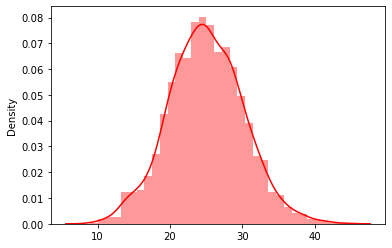

In [3]:
X1=np.random.normal(loc=25,scale=5,size=2000)## location=loc=mean, scale=S.D.=5. creating 2000 random points taken from a ND having mean as 25 and S.D. as 5
sns.distplot(X1,color='red',kde=True); ## kde is kernel density estimation. If we put kde=False, we will not get the ND curve

C:\Users\Adithya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


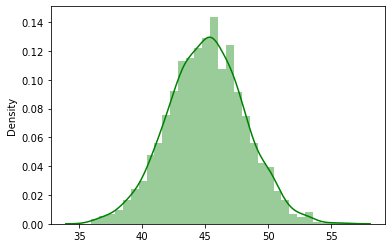

In [4]:
X2=np.random.normal(loc=45,scale=3,size=2000) ## creating 2000 random points taken from a ND having mean as 45 and S.D. as 3
sns.distplot(X2,color='green',kde=True);

C:\Users\Adithya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


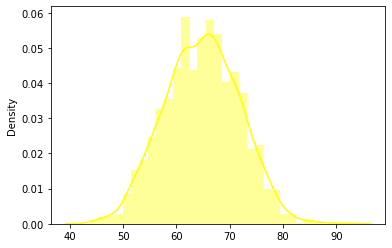

In [5]:
X3=np.random.normal(loc=65,scale=7,size=2000) ## creating 2000 random points taken from a ND having mean as 65 and S.D. as 7
sns.distplot(X3,color='yellow',kde=True);

C:\Users\Adithya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


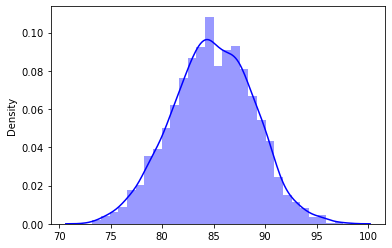

In [6]:
X4=np.random.normal(loc=85,scale=4,size=2000) ## creating 2000 random points taken from a ND having mean as 85 and S.D. as 4
sns.distplot(X4,color='blue',kde=True);

In [7]:
## now, we have 4 independent values, so we will create a mixture of gaussian distributions.
## Creating a mixture of Gaussian

X=np.hstack((X1,X2,X3,X4))

In [8]:
X

array([16.25117263, 26.71340202, 30.76517901, ..., 78.21331852,
       87.58552884, 86.39771956])

C:\Users\Adithya\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


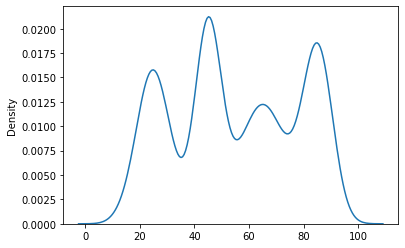

In [9]:
sns.distplot(X,kde=True,hist=False);

## Building a GMM for Clustering

In [10]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4,n_init=10) ## n_components: number of clusters
gmm.fit(X.reshape(-1,1)) ## since it is 1-D, we need to reshape

GaussianMixture(n_components=4, n_init=10)

In [11]:
## Predicting

pred=gmm.predict(X.reshape(-1,1))

In [12]:
pred

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [13]:
np.unique(pred)

array([0, 1, 2, 3], dtype=int64)

In [14]:
np.bincount(pred) ## corresponding to label 0, model has predicted 1992 data points.
                  ## There might be some confusion w.r.t some data points since the means are very close 25, 45, 65, 85

array([2060, 2085, 1877, 1978], dtype=int64)

In [15]:
## Estimation of parameters

gmm.means_  ## These are population means

array([[84.73025748],
       [45.17423966],
       [64.76344111],
       [24.85833579]])

In [16]:
gmm.covariances_

array([[[16.97315764]],

       [[10.44596771]],

       [[42.67633503]],

       [[24.86171226]]])

In [17]:
gmm.weights_  ## 24.96% belongs to label 0 and so on

array([0.25613105, 0.25761168, 0.23850193, 0.24775534])

In [18]:
## Creating a sample of data points

gmm.sample(1000)

(array([[83.96645713],
        [85.77864297],
        [85.08658812],
        [85.66494266],
        [81.06885149],
        [81.71763764],
        [75.97286059],
        [80.08054198],
        [82.28869498],
        [82.14066748],
        [78.94831182],
        [80.41084674],
        [80.83213671],
        [83.70437399],
        [92.32390632],
        [80.45869258],
        [86.52803996],
        [83.59597743],
        [84.97837495],
        [83.14568957],
        [82.52356857],
        [82.88332206],
        [84.62596072],
        [91.77689159],
        [92.30589256],
        [80.32260815],
        [82.34933653],
        [85.90344619],
        [73.62818152],
        [85.70984686],
        [84.86157499],
        [90.5460915 ],
        [86.03564555],
        [86.45534353],
        [76.85083836],
        [80.79379615],
        [88.39488294],
        [80.69850643],
        [83.97475805],
        [85.85605151],
        [84.07531115],
        [86.24602085],
        [84.30181391],
        [84

## Finding the no.of Clusters

In [22]:
n_components = np.arange(1,10)
aic_scores = []
bic_scores = []
for n in n_components:
    model = GaussianMixture(n,n_init=10)
    model.fit(X.reshape(-1,1))
    aic_score = model.aic(X.reshape(-1,1))
    bic_score = model.bic(X.reshape(-1,1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

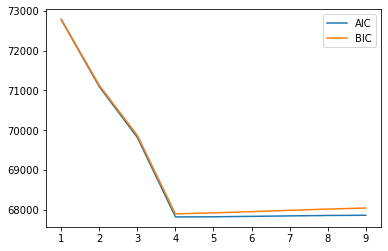

In [23]:
# Plotting 

plt.plot(n_components, aic_scores, label='AIC')
plt.plot(n_components, bic_scores, label='BIC')
plt.legend();

## The number of Clusters = 4 

## Building GMM for the data 

In [24]:
data = pd.read_csv('gmm_data.csv')

In [25]:
data

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


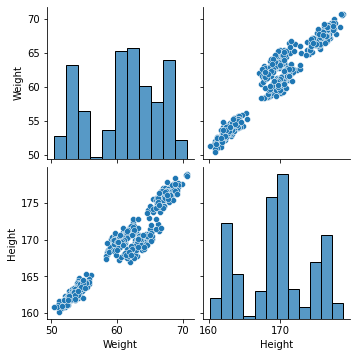

In [27]:
sns.pairplot(data);

## Finding the no. of Clusters

In [28]:
n_components = np.arange(1,10)
aic_scores = []
bic_scores = []
for n in n_components:
    model = GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score = model.aic(data)
    bic_score = model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Adithya\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

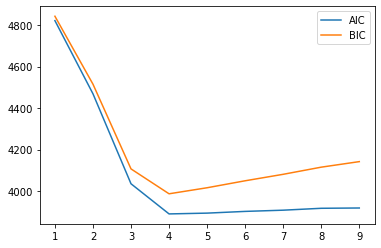

In [29]:
plt.plot(n_components, aic_scores, label='AIC')
plt.plot(n_components, bic_scores, label='BIC')
plt.legend();

## The number of Clusters = 4 

## Building the Model 

In [30]:
gmm_data = GaussianMixture(n_components=4, n_init=10)

In [31]:
gmm_data.fit(data)

GaussianMixture(n_components=4, n_init=10)

In [32]:
data_pred = gmm_data.predict(data)

In [33]:
data_pred

array([3, 3, 2, 2, 3, 0, 0, 2, 2, 1, 0, 3, 0, 1, 2, 2, 3, 2, 1, 2, 2, 3,
       0, 1, 2, 1, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 1, 2, 1, 3, 1, 2, 2, 3,
       0, 3, 2, 2, 3, 3, 1, 1, 0, 2, 2, 0, 0, 1, 1, 3, 3, 1, 3, 3, 3, 0,
       2, 3, 2, 0, 1, 2, 1, 3, 1, 3, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1,
       3, 1, 1, 1, 3, 1, 2, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 0, 3, 2, 1,
       1, 0, 1, 1, 3, 1, 3, 2, 0, 3, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 2, 1,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 3, 3, 3, 0, 1, 2, 2, 0, 1, 1, 3, 2, 2,
       2, 0, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 3, 2, 1, 0, 3, 1, 3, 0, 2, 1,
       2, 1, 1, 1, 3, 3, 3, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1, 0, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 3, 3, 2, 3, 0, 1, 1, 1,
       2, 3, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 3, 3, 0,
       0, 3, 1, 1, 2, 3, 2, 2, 2, 0, 3, 1, 2, 1, 1, 0, 1, 0, 2, 2, 3, 1,
       3, 3, 2, 2, 1, 3, 2, 1, 3, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 0, 3, 0,
       0, 3, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3,

In [35]:
gmm_data.means_

array([[ 63.29340653, 169.26192487],
       [ 53.60032207, 162.76480175],
       [ 60.65965331, 170.03408316],
       [ 67.50985394, 175.97078199]])

In [37]:
gmm_data.covariances_

array([[[1.56855087, 1.12091738],
        [1.12091738, 1.13465758]],

       [[1.24923216, 0.95686471],
        [0.95686471, 1.02835817]],

       [[1.31553487, 0.97514708],
        [0.97514708, 1.08387744]],

       [[1.30109731, 0.97830282],
        [0.97830282, 1.15566526]]])

In [38]:
gmm_data.weights_

array([0.24867638, 0.25000038, 0.25016717, 0.25115608])

## Adding Labels to DataFrame 

In [39]:
data['Label'] = data_pred

In [40]:
data

,Weight,Height,Label
0,67.062924,176.086355,3
1,68.804094,178.388669,3
2,60.930863,170.284496,2
3,59.733843,168.691992,2
4,65.431230,173.763679,3
...,...,...,...
495,59.976983,169.679741,2
496,66.423814,174.625574,3
497,53.604698,161.919208,1
498,50.433644,160.794875,1


In [41]:
data['Label'].value_counts()

3    126
2    125
1    125
0    124
Name: Label, dtype: int64

## Visualising the Clusters

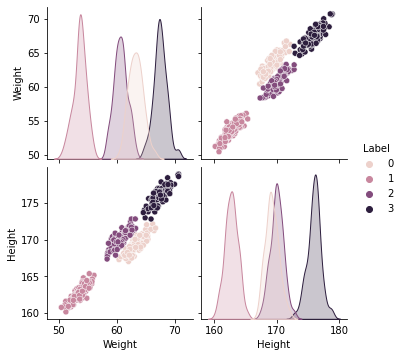

In [44]:
sns.pairplot(data, hue='Label');

## Generating Samples 

In [45]:
gmm_data.sample(10000)

(array([[ 62.1287439 , 168.83609375],
        [ 61.93679091, 168.06656577],
        [ 61.86375209, 169.19468431],
        ...,
        [ 67.15533296, 175.8145562 ],
        [ 66.61127987, 175.52038766],
        [ 64.50190422, 172.67979485]]),
 array([0, 0, 0, ..., 3, 3, 3]))